# Creating plot of weekly drift on daily wind on daily size

## Import packages

In [1]:
# general
import numpy as np, numpy.ma as ma
import xarray as xr
import pandas as pd

# time
from datetime import datetime, timedelta
import matplotlib.dates as mdates

# local system 
import sys  
import glob
import os

# plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.colors
import cmocean

# geo plotting
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeat

# for use in suppressing repeated warnings when mapping w/ shapely
import shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

# path to own functions
sys.path.append('../Libraries_functions/')
from LIB_ASI_SIC_UniB import grab_ASI_SIC, grab_projinfo_SIC
from LIB_geo_func import *
from LIB_geo_plot import *


# OSI SAF sea ice drift
from LIB_OSI_SAF import grab_projinfo_OSISAF, grab_OSISAF_drift

# NSIDC sea ice drift
from LIB_PPdrift_NSIDC0116 import grab_projinfo_PPdrift

# ERA5
# from LIB_access_ERA5 import grab_ERA5

%load_ext autoreload
%autoreload 2
# potentially uninstall pyhdf?

# math
import math

/var/folders/1y/8_442fb923bb526xtrg6y2p80000gr/T/ipykernel_24094/862898054.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_daily_size['time'] = pd.to_datetime(df_daily_size.time)


Text(0.5, 1.0, 'Polynya stuff')

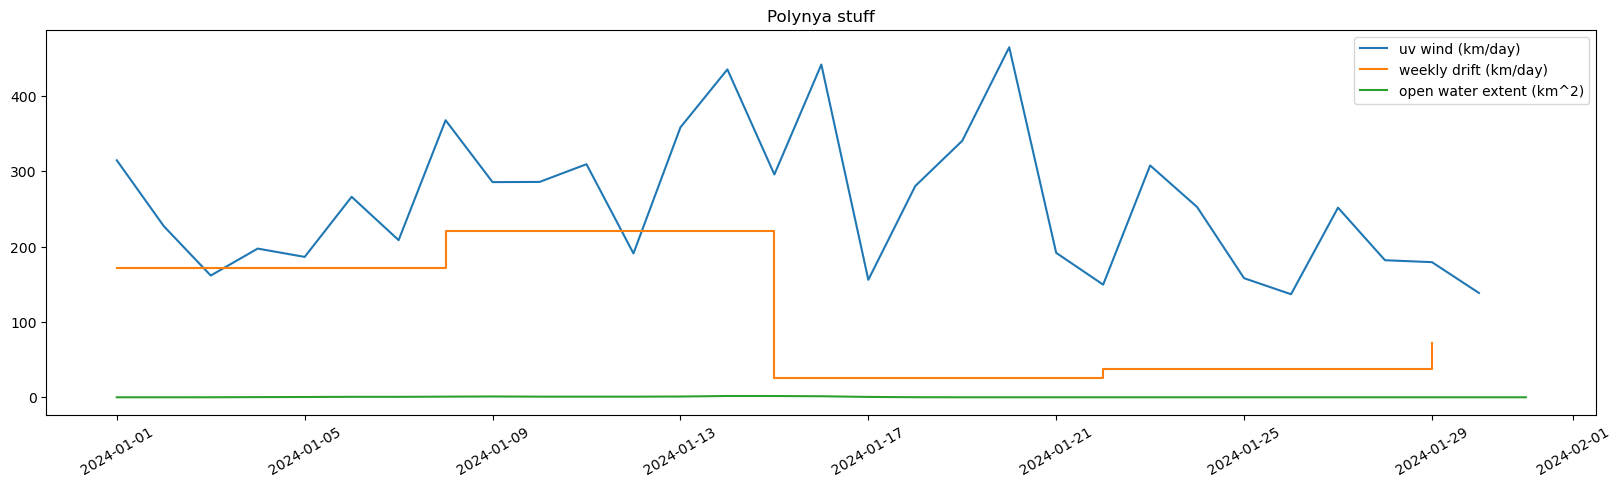

In [15]:
# d = {'time': short_list, 'u10_average': short_u10_average, 't2m_average': short_t2m_average, 'v10_average': short_v10_average, 'uv_wind': uv_wind}
# df2 = pd.DataFrame(data=d)
# df2.to_csv('./Data/speeds_wind.csv', index=None) #removes Index column

#read in the data files
df_daily_wind = pd.read_csv("/Users/reu/Box/Data/speeds_wind.csv")
df_wk_drift = pd.read_csv('/Users/reu/Box/Data/weekly_speeds_drift.csv')
df_daily_size = pd.read_csv("/Users/reu/Box/Data/SIC.csv")

#converting the times to the correct format
df_daily_wind['time'] = pd.to_datetime(df_daily_wind.time)
df_wk_drift['time'] = pd.to_datetime(df_wk_drift.time)
df_daily_size['time'] = pd.to_datetime(df_daily_size.time)


fig4, ax4 = plt.subplots(figsize=(20,5))

plt.plot(df_daily_wind.time, df_daily_wind.uv_wind*86.4, label='uv wind (km/day)')
plt.step(df_wk_drift.time, df_wk_drift.weekly_avg_uv*10, where = 'post', label = 'weekly drift (km/day)')
plt.plot(df_daily_size.time, df_daily_size.Open_water_extent/10000, label = 'open water extent (km^2)')

ax4.legend()
plt.xticks(rotation=30)
plt.title(f'Polynya stuff')

In [ ]:
## stick plot
#starts an array

fig, ax = plt.subplots(figsize = (20, 5))
qv = plt.quiver(date_list, np.zeros_like(date_list), u10_average, v10_average, width=0.003)
qk = ax.quiverkey(qv, 10, 10, 5, r'$20 \frac{km}{day}$',labelpos='E' )

#why is it not showing up!

# save figure, if desired
# save_path = f'/Users/reu/Desktop/quiver.png'
# fig.savefig(save_path, dpi=300, bbox_inches = 'tight')

#formatting the plot
plt.xticks(rotation=30)
plt.xticks(date_list)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
plt.yticks([])
#labels
plt.xlabel('Date')
#ax.axvspan(datetime(2024, 1, 10), datetime(2024, 1, 15), facecolor='silver', alpha=0.5)

plt.title(f'u-v wind {date_list[0].strftime("%d-%b-%Y")} to {date_list[-1].strftime("%d-%b-%Y")} over polynya')